<a href="https://colab.research.google.com/github/ianravisingh/Tensorflow-2.0/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [10]:
# load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print(f'Shape of X_train: {X_train.shape}')

Shape of X_train: (60000, 28, 28)


In [15]:
# the data is 2d
# convolution expects height x width x color
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

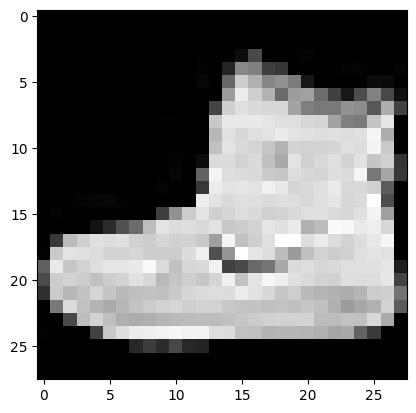

In [35]:
# show image
plt.imshow(X_train[0], cmap='gray')
plt.show()

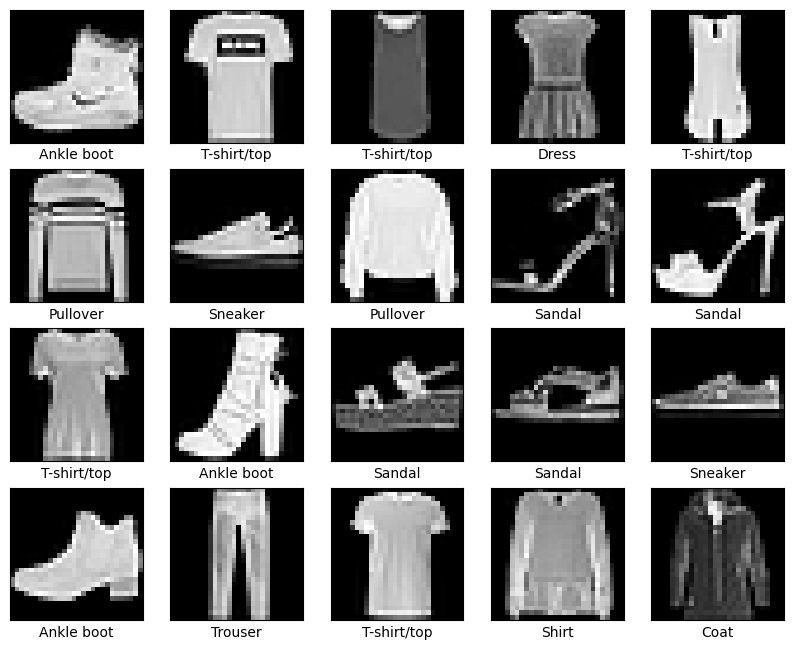

In [42]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
plt.show()

In [20]:
k = len(set(y_train))
print('Number of classes: ',k)

Number of classes:  10


In [45]:
# Build the model using functional API
model = Sequential()
model.add(Input(shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=2, activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(k, activation='softmax'))

In [47]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5220 - accuracy: 0.8074 - val_loss: 0.4137 - val_accuracy: 0.8470
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3625 - accuracy: 0.8646 - val_loss: 0.3358 - val_accuracy: 0.8762
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3107 - accuracy: 0.8828 - val_loss: 0.3152 - val_accuracy: 0.8822
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2794 - accuracy: 0.8943 - val_loss: 0.3054 - val_accuracy: 0.8907
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2537 - accuracy: 0.9054 - val_loss: 0.3035 - val_accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2316 - accuracy: 0.9118 - val_loss: 0.2848 - val_accuracy: 0.9001
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2170 - accuracy: 0.9169 - val_loss: 0.3010 -

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)              

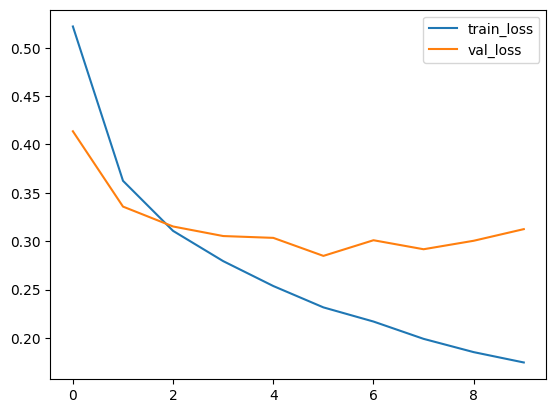

In [48]:
# plot loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

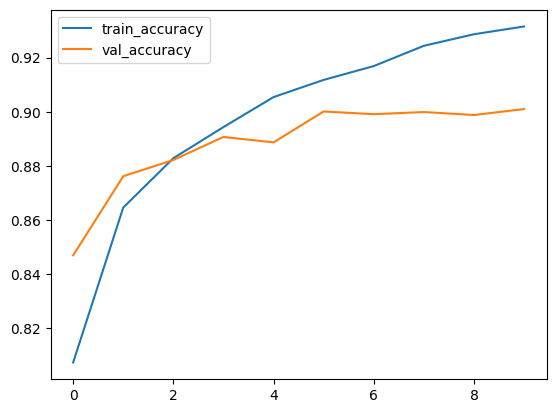

In [49]:
# plot accuracy
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [60]:
# evaluate the model with test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3125 - accuracy: 0.9010


[0.3125080466270447, 0.9010000228881836]

In [58]:
# predict
y_hat = model.predict(X_test).argmax(axis=1)
y_hat.shape

313/313 [==============================] - 1s 4ms/step


(10000,)

<Figure size 36x18 with 0 Axes>

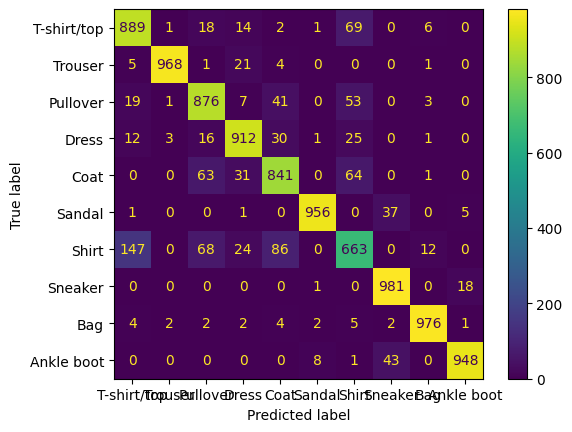

In [68]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(40,20), dpi=0.9)
fig = ConfusionMatrixDisplay(cf, display_labels=class_names)
fig.plot()
plt.show()

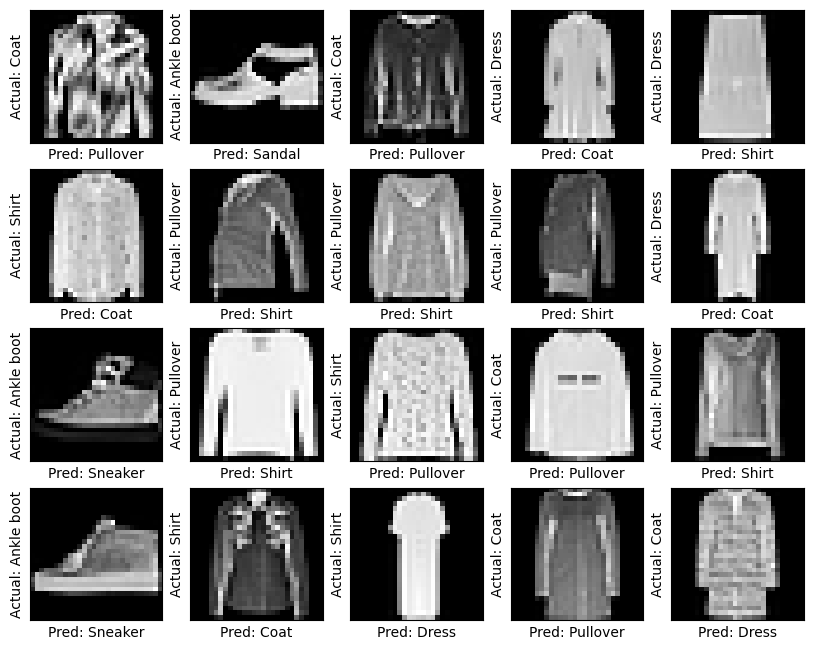

In [79]:
# show some misclassified images
missclassified_idx = np.where(y_test!=y_hat)[0]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[missclassified_idx[i]], cmap='gray')
  plt.xlabel(f'Pred: {class_names[y_hat[missclassified_idx[i]]]}')
  plt.ylabel(f'Actual: {class_names[y_test[missclassified_idx[i]]]}')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
plt.show()